# Histogram to justify 55mm

In [98]:
import xarray as xr 
import matplotlib.pyplot as plt

In [45]:
!ls ../../Library/CloudStorage/Box-Box/VaporLakes/data/

AMSR2
Eq_7day_cases_2014-2018.pdf
IMERG_WEIO_monthly.nc
LAKEBYLAKE
M2_WEIO_monthly_2017_3D_myfields.nc
M2_WEIO_monthly_2D_myfields.nc
M2_global_monthly_2D_myfields.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_00Z.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_06Z.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_06Z.xidv
M2tqv_WEIO_3rdgridcell_30thday_instant_06Z_wrongmaybe.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_06Znew.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_12Z.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_18Z.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_18Z.xidv
M2tqv_WEIO_3rdgridcell_30thday_instant_18Z_wrongmaybe.nc
M2tqv_WEIO_3rdgridcell_30thday_instant_18Znew.xidv
M2tqv_WEIO_3rdgridcell_30thday_instant_6Z.nc
Seychelles_May2017.html


# MERRA2 histograms 

In [173]:
!ls ~/Box/VaporLakes/data/M2tqv_WEIO_3rdgridcell_30thday_instant_*.nc

/Users/brianmapes/Box/VaporLakes/data/M2tqv_WEIO_3rdgridcell_30thday_instant_00Z.nc
/Users/brianmapes/Box/VaporLakes/data/M2tqv_WEIO_3rdgridcell_30thday_instant_06Z.nc
/Users/brianmapes/Box/VaporLakes/data/M2tqv_WEIO_3rdgridcell_30thday_instant_12Z.nc
/Users/brianmapes/Box/VaporLakes/data/M2tqv_WEIO_3rdgridcell_30thday_instant_18Z.nc


In [174]:
ds = xr.open_mfdataset('~/Box/VaporLakes/data/M2tqv_WEIO_3rdgridcell_30thday_instant_*.nc',
                      combine="nested") # pool data, ignore time coordinate not being monotonic
ds

<xarray.Dataset>
Dimensions:    (time: 2096, Longitude: 20, Latitude: 21)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 ... 2022-12-23T18:00:00
  * Longitude  (Longitude) float64 40.0 41.88 43.75 45.62 ... 71.88 73.75 75.62
  * Latitude   (Latitude) float32 -15.5 -14.0 -12.5 -11.0 ... 11.5 13.0 14.5
Data variables:
    tqv        (time, Latitude, Longitude) float32 dask.array<chunksize=(2096, 21, 20), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.X
    History:      Translated from VisAD grid to CF-1.X Conventions by IDV\nOr...

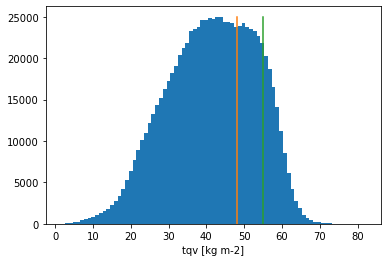

In [176]:
ds.tqv.plot(bins=81); plt.plot([48,48],[0,25000]); plt.plot([55,55],[0,25000])

In [137]:
#group = ds.groupby_bins('tqv',100)
#group.mean().values()

import matplotlib.pyplot as plt
plt.plot(group.mean().to_array())

In [138]:
!ls ~/Box/VaporLakes/data/AMSR2/2023/*2023-02-1*.nc

/Users/brianmapes/Box/VaporLakes/data/AMSR2/2023/RSS_AMSR2_ocean_L3_daily_2023-02-10_v08.2.nc
/Users/brianmapes/Box/VaporLakes/data/AMSR2/2023/RSS_AMSR2_ocean_L3_daily_2023-02-11_v08.2.nc
/Users/brianmapes/Box/VaporLakes/data/AMSR2/2023/RSS_AMSR2_ocean_L3_daily_2023-02-12_v08.2.nc
/Users/brianmapes/Box/VaporLakes/data/AMSR2/2023/RSS_AMSR2_ocean_L3_daily_2023-02-13_v08.2.nc


In [149]:
# https://stackoverflow.com/questions/65376109/use-xarray-open-mfdataset-on-files-with-no-time-dimension-included
from datetime import datetime
def add_time_dim(xda):
    xda = xda.expand_dims(times = [datetime.now()])
    return xda


# AMSR2 

In [152]:
amsr2 = xr.open_mfdataset('~/Box/VaporLakes/data/AMSR2/2023/RSS_AMSR2_ocean_L3_daily_2023-02-10_v08.2.nc')
amsr2

<xarray.Dataset>
Dimensions:             (lon: 1440, lat: 720, pass: 2)
Coordinates:
  * lon                 (lon) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * pass                (pass) int32 1 2
Data variables:
    time                (pass, lat, lon) datetime64[ns] dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    SST                 (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    wind_speed_LF       (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    wind_speed_MF       (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    wind_speed_AW       (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    water_vapor         (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    cloud_liquid_water  (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    rain_rate           (pass, lat, lon) float32 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    land_mask           (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    sea_ice_mask        (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    coast_mask          (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    noobs_mask          (pass, lat, lon) int8 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                            CF-1.6
    title:                                  RSS AMSR2 V8.2 Air-Sea Essential ...
    summary:                                RSS climate quality air-sea produ...
    version:                                8.2
    processing_level:                       Level 3: 0.25 deg daily maps
    history:                                created by RSS
    ...                                     ...
    geospatial_lon_units:                   degrees_east
    references:                             Source_of_AMSR2_radiometer_observ...
    averaging_procedure:                    each grid cell contains valid obs...
    approx_local_equatorial_crossing_time:  node_dimension 1 = 13:30h,  node_...
    pass:                                   node_dimension 1 = ascending,  no...
    acknowledgement:                        AMSR2 AS-ECVs are produced by Rem...

### Get time of day field

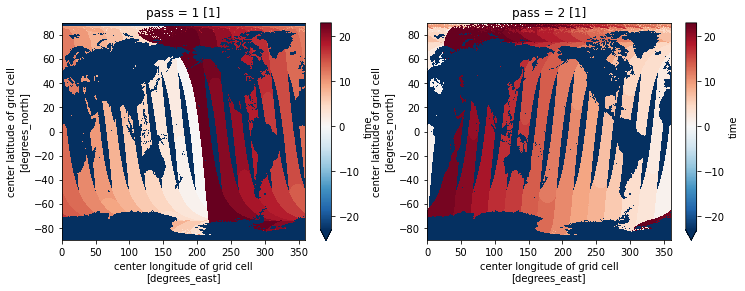

In [153]:
# https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64/70905349#70905349

Y, M, D, h, m, s = [amsr2.time.astype('datetime64[%s]' % kind) for kind in 'YMDhms']

years = Y.astype(int) + 1970
months = M.astype(int) % 12 + 1
days = (D - M).astype(int) + 1
hours = (h - D).astype(int)
minutes = (m - h).astype(int)
seconds = (s - m).astype(int)

# Make a plot 
plt.figure(figsize=[12,4])
plt.subplot(121)
hours[0].plot()
plt.subplot(122)
hours[1].plot()

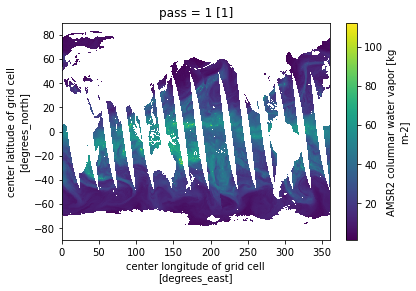

In [154]:
amsr2.water_vapor[0].plot()

# Multiple AMSR2 daily files: make a time series dataset 

In [180]:
!ls ~/Box/VaporLakes/data/AMSR2/

2012             2016             2020             get_all_days.sh
2013             2017             2021             get_all_days.sh~
2014             2018             2022
2015             2019             2023


In [168]:
# trick from https://stackoverflow.com/questions/65376109/
#                  use-xarray-open-mfdataset-on-files-with-no-time-dimension-included

from datetime import datetime 
def add_time_dim(xda):
    xda = xda.expand_dims(time = [datetime.now()])
    return xda

In [181]:
amsr2s = xr.open_mfdataset('~/Box/VaporLakes/data/AMSR2/*/RSS_AMSR2_ocean_L3_daily_*.nc',
                           preprocess = add_time_dim) # pool data, ignore time coordinate not being monotonic
amsr2s

OSError: [Errno -101] NetCDF: HDF error: b'/Users/brianmapes/Box/VaporLakes/data/AMSR2/2015/RSS_AMSR2_ocean_L3_daily_2015-12-19_v08.2.nc'

In [ ]:
# WEIO box 40-75, -15 to 15 as used in MERRA2 histogram 
mybox = amsr2s.sel(lat=slice(-15,15),lon=slice(40,75))
mybox

In [ ]:
mybox.water_vapor.plot(bins=100); plt.plot([48,48],[0,250000]); plt.plot([55,55],[0,250000])

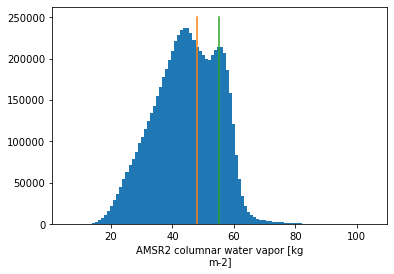

In [171]:
# 2014 only mybox.water_vapor.plot(bins=100); plt.plot([48,48],[0,250000]); plt.plot([55,55],[0,250000])

In [170]:
# Speeds up replotting

histo = mybox.groupby_bins('water_vapor',100).mean()
histo.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [172]:
histo

<xarray.Dataset>
Dimensions:             (water_vapor_bins: 100)
Coordinates:
  * water_vapor_bins    (water_vapor_bins) object (5.77, 6.86] ... (103.999, ...
Data variables:
    SST                 (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_speed_LF       (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_speed_MF       (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wind_speed_AW       (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    water_vapor         (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    cloud_liquid_water  (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    rain_rate           (water_vapor_bins) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    land_mask           (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    sea_ice_mask        (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    coast_mask          (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    noobs_mask          (water_vapor_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>

In [ ]:
Y, M, D, h, m, s = [amsr2s.time.astype('datetime64[%s]' % kind) for kind in 'YMDhms']

years = Y.astype(int) + 1970
months = M.astype(int) % 12 + 1
days = (D - M).astype(int) + 1
hours = (h - D).astype(int)
minutes = (m - h).astype(int)
seconds = (s - m).astype(int)



In [ ]:
# Assign proper times 

# amsr2s['times'] = 
